## Website_Visitors

## import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import Normalize

from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import plotly.express as px
from statsmodels.tsa.stattools import coint, adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
import pmdarima as pm
import time

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Visitors_data=pd.read_csv('Website Vistiors.csv')
Visitors_data.head()

Date  Daily Visitors
0  01-10-2021            2649
1  02-10-2021            2000
2  03-10-2021            2011
3  04-10-2021            3219
4  05-10-2021            3870

In [3]:
Visitors_data.shape

(173, 2)

In [4]:
Visitors_data['Daily Visitors'].describe()

count     173.000000
mean     2829.907514
std       765.194741
min      1245.000000
25%      2336.000000
50%      2751.000000
75%      3207.000000
max      7165.000000
Name: Daily Visitors, dtype: float64

In [5]:
Visitors_data.isna().sum()

Date              0
Daily Visitors    0
dtype: int64

In [6]:
Visitors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            173 non-null    object
 1   Daily Visitors  173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [7]:
Visitors_data.columns = ['Date','Daily_Visitors']
Visitors_data['Date'] = pd.to_datetime(Visitors_data['Date'], format='%d-%m-%Y')
Visitors_data = Visitors_data.set_index('Date')
Visitors_data.head()

Daily_Visitors
Date                      
2021-10-01            2649
2021-10-02            2000
2021-10-03            2011
2021-10-04            3219
2021-10-05            3870

In [8]:
Visitors_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2021-10-01 to 2022-03-22
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Daily_Visitors  173 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


In [9]:
norm = Normalize(vmin=0, vmax=1)
normalized_data = norm(Visitors_data)

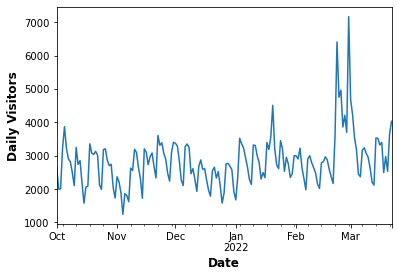

In [10]:
Visitors_data['Daily_Visitors'].plot()
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Daily Visitors',weight='bold',size=12)
plt.show()

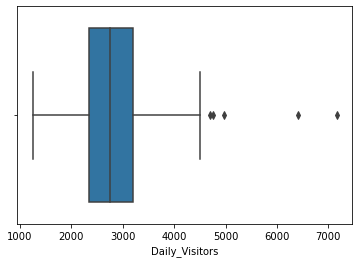

In [11]:
sns.boxplot(Visitors_data['Daily_Visitors'])
plt.show()

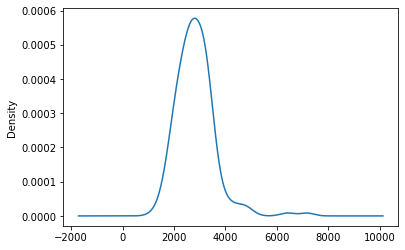

In [12]:
#Density_chart
Visitors_data['Daily_Visitors'].plot(kind='kde')
plt.show()

### Transforming data to Normal Distribution

In [13]:
def diagnostic_plots(Visitors_data, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    Visitors_data[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(Visitors_data[variable], dist='norm',plot=plt)
    
    plt.show()
    

### Log Transformation

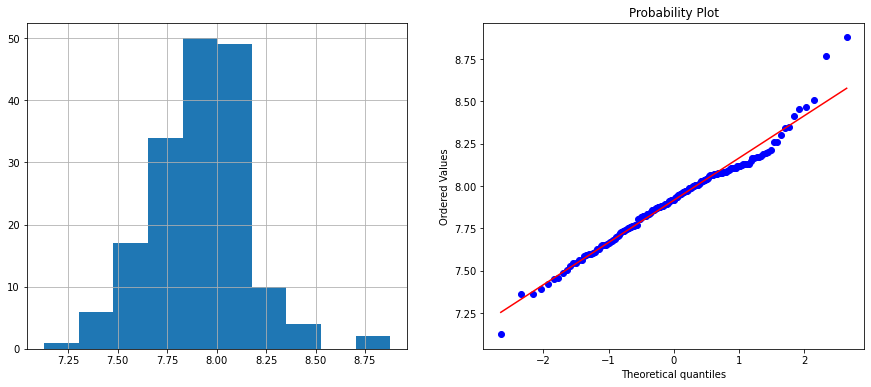

In [14]:
from scipy import stats
Visitors_data['Log_Daily_Visitors']=np.log(Visitors_data['Daily_Visitors']+1)
diagnostic_plots(Visitors_data,'Log_Daily_Visitors')

### Reciprocal Transformation

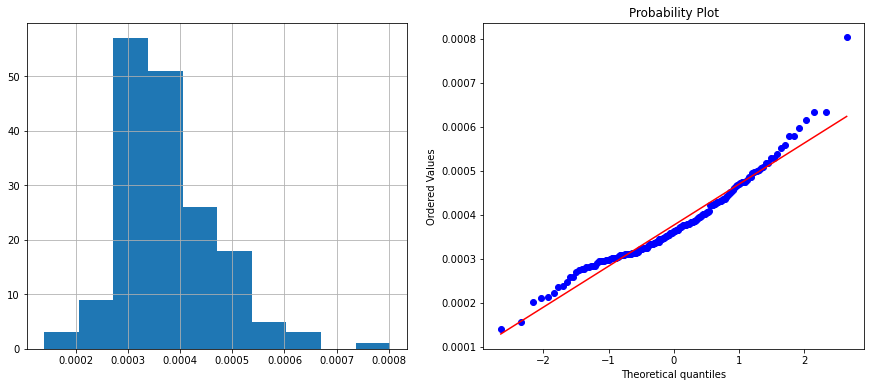

In [15]:
Visitors_data['Rec_Daily_Visitors']=1/(Visitors_data['Daily_Visitors']+1)
diagnostic_plots(Visitors_data,'Rec_Daily_Visitors')

### Square-Root Transformation

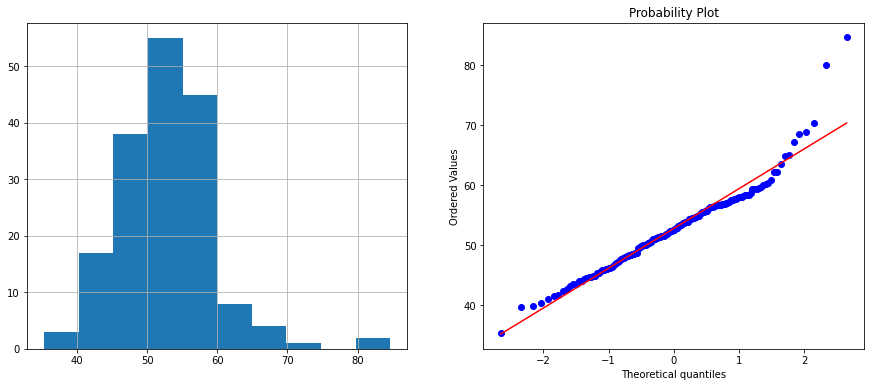

In [16]:
Visitors_data['sqr_Daily_Visitors']=Visitors_data['Daily_Visitors']**(1/2)
diagnostic_plots(Visitors_data,'sqr_Daily_Visitors')

### Exponential Transformation

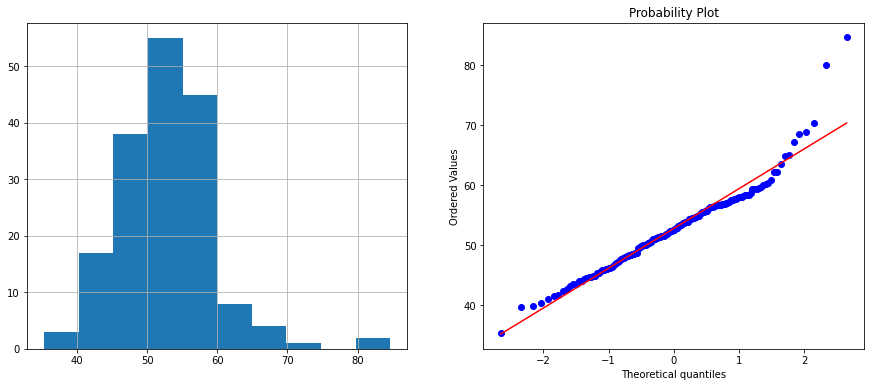

In [17]:
Visitors_data['Exp_Daily_Visitors']=Visitors_data['Daily_Visitors']**(1/5)
diagnostic_plots(Visitors_data,'sqr_Daily_Visitors')

In [18]:
Visitors_data.dtypes

Daily_Visitors          int64
Log_Daily_Visitors    float64
Rec_Daily_Visitors    float64
sqr_Daily_Visitors    float64
Exp_Daily_Visitors    float64
dtype: object

<AxesSubplot:xlabel='Date'>

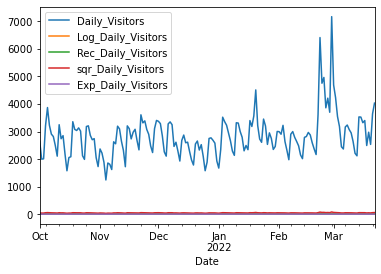

In [19]:
Visitors_data.plot()

<AxesSubplot:xlabel='Date'>

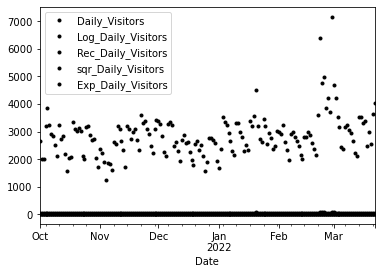

In [20]:
Visitors_data.plot(style='k.')

In [21]:
Visitors_data.describe()

Daily_Visitors  Log_Daily_Visitors  Rec_Daily_Visitors  \
count      173.000000          173.000000          173.000000   
mean      2829.907514            7.916344            0.000376   
std        765.194741            0.250185            0.000095   
min       1245.000000            7.127694            0.000140   
25%       2336.000000            7.756623            0.000312   
50%       2751.000000            7.920083            0.000363   
75%       3207.000000            8.073403            0.000428   
max       7165.000000            8.877103            0.000803   

       sqr_Daily_Visitors  Exp_Daily_Visitors  
count          173.000000          173.000000  
mean            52.765757            4.876581  
std              6.778494            0.245998  
min             35.284558            4.159430  
25%             48.332184            4.717312  
50%             52.449976            4.874141  
75%             56.630381            5.025969  
max             84.646323            5.902598

##### Since we didnot get any conclusive evidence of being normal distribution. We have decided to move on without transforming it to normal distribution

### Dropping all transformed values from dataset

In [22]:
Visitors_data=Visitors_data.drop(['Log_Daily_Visitors','Rec_Daily_Visitors','sqr_Daily_Visitors','Exp_Daily_Visitors'],axis=1)

In [23]:
Visitors_data.head()

Daily_Visitors
Date                      
2021-10-01            2649
2021-10-02            2000
2021-10-03            2011
2021-10-04            3219
2021-10-05            3870

In [24]:
Visitors_data.dtypes

Daily_Visitors    int64
dtype: object

In [25]:
Visitors_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2021-10-01 to 2022-03-22
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Daily_Visitors  173 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


In [26]:
px.histogram(Visitors_data,x='Daily_Visitors')

In [27]:
Visitors_data.describe()

Daily_Visitors
count      173.000000
mean      2829.907514
std        765.194741
min       1245.000000
25%       2336.000000
50%       2751.000000
75%       3207.000000
max       7165.000000

## A) MODEL BUILDING ON STATIONARY DATA

### Test Stationary

#### Naive test for stationary by checking constant mean and variance

In [28]:
X=Visitors_data.values
split=round(len(X)/2)
X1, X2=X[0:split],X[split:]
mean1, mean2=X1.mean(),X2.mean()
var1, var2=X1.var(), X2.var()
print('mean1=%f, mean=%f' %(mean1,mean2))
print('variance1=%f,variance2=%f' %(var1,var2))

mean1=2612.651163, mean=3044.666667
variance1=307739.529475,variance2=760604.107280


#### Since mean and variance changes drastically it is evident that out data is not stationary. Let's confirm it using ADFuller test.

### Testing Stationary using ADFuller test

In [29]:
def TestStationaryPlot(Visitors_data):
    rol_mean=Visitors_data.rolling(window=20, center= False).mean()
    rol_std= Visitors_data.rolling(window=20, center=False).std()
    
    plt.plot(Visitors_data, color='blue',label='Original Data')
    plt.plot(rol_mean,color='red',label='Rolling Mean')
    plt.plot(rol_std,color='black',label='Rolling Std')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.xlabel('Time in Date',fontsize=10)
    plt.ylabel('Total Daily Visitors',fontsize=10)
    plt.legend(loc='best',fontsize=10)
    plt.title('Rolling Mean & Standard Deviation',fontsize=10)
    plt.show(block=True)

In [30]:
# null Hypothesis : Data is stationary
#alternate hypothesis : Data is not stationary
def TestStationaryAdfuller(Visitors_data,cutoff=0.01):
    Visitors_data_test=adfuller(Visitors_data, autolag='AIC')
    Visitors_data_test_output=pd.Series(Visitors_data_test[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observations Used'])
    
    for key,value in Visitors_data_test[4].items():
        Visitors_data_test_output['Critical Value (%s)'%key]= value
    print(Visitors_data_test_output)
    
    if Visitors_data_test[1]<=cutoff:
        print('Failed to reject null hypothesis. Data is stationary')
    else:
        print('Failed to accept null Hypothesis. Data is non-stationary')

In [31]:
TestStationaryAdfuller(Visitors_data)

Test Statistic                  -2.358587
p-value                          0.153768
#Lags Used                      14.000000
Number of observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64
Failed to accept null Hypothesis. Data is non-stationary


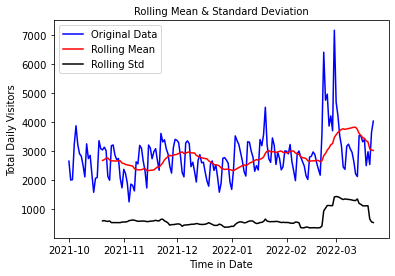

In [32]:
TestStationaryPlot(Visitors_data)

### Transforming data to Stationary

#### Transforming data to stationary using three following methods:

#### 1.Moving Average 2.Differencing 3.Decomposing

### 1.Moving Average

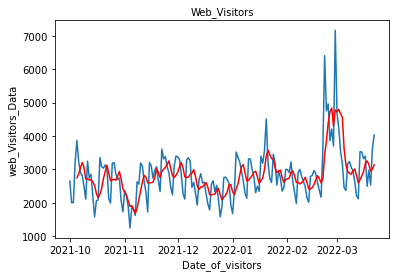

In [33]:
moving_avg=Visitors_data.rolling(5).mean()
plt.plot(Visitors_data)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date_of_visitors',fontsize=10)
plt.ylabel('web_Visitors_Data',fontsize=10)
plt.title('Web_Visitors',fontsize=10)
plt.show()

In [34]:
moving_avg_diff=Visitors_data-moving_avg
moving_avg_diff.head(30)

Daily_Visitors
Date                      
2021-10-01             NaN
2021-10-02             NaN
2021-10-03             NaN
2021-10-04             NaN
2021-10-05          1120.2
2021-10-06           357.6
2021-10-07          -139.6
2021-10-08          -386.6
2021-10-09          -563.8
2021-10-10          -603.4
2021-10-11           531.4
2021-10-12            56.6
2021-10-13           161.6
2021-10-14          -439.8
2021-10-15          -942.8
2021-10-16          -224.8
2021-10-17           -65.2
2021-10-18          1103.6
2021-10-19           646.4
2021-10-20           314.4
2021-10-21           194.4
2021-10-22          -108.4
2021-10-23          -753.0
2021-10-24          -669.6
2021-10-25           493.4
2021-10-26           502.6
2021-10-27           188.4
2021-10-28           -85.4
2021-10-29          -196.8
2021-10-30          -658.4

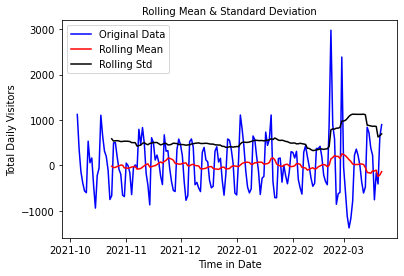

In [35]:
moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(moving_avg_diff)

In [36]:
TestStationaryAdfuller(moving_avg_diff)

Test Statistic                  -3.828015
p-value                          0.002633
#Lags Used                      14.000000
Number of observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64
Failed to reject null hypothesis. Data is stationary


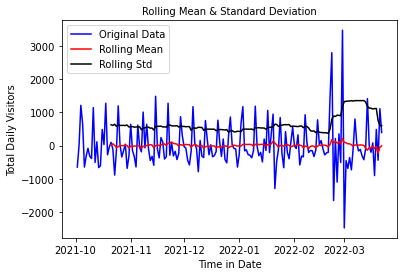

In [37]:
Visitors_data_first_difference=Visitors_data-Visitors_data.shift(1)
TestStationaryPlot(Visitors_data_first_difference.dropna(inplace=False))

In [38]:
TestStationaryAdfuller(Visitors_data_first_difference.dropna(inplace=False))

Test Statistic                -6.607171e+00
p-value                        6.512663e-09
#Lags Used                     1.200000e+01
Number of observations Used    1.590000e+02
Critical Value (1%)           -3.472161e+00
Critical Value (5%)           -2.879895e+00
Critical Value (10%)          -2.576557e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


### 2.Eliminating trend and seasonality: Differencing

#### 2(A) : First order differencing

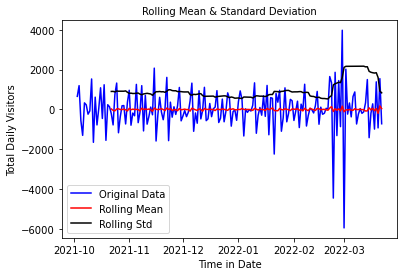

In [39]:
Visitors_data_seasonal_first_difference=Visitors_data_first_difference-Visitors_data_first_difference.shift(1)
TestStationaryPlot(Visitors_data_seasonal_first_difference.dropna(inplace=False))

In [40]:
TestStationaryAdfuller(Visitors_data_first_difference.dropna(inplace=False))

Test Statistic                -6.607171e+00
p-value                        6.512663e-09
#Lags Used                     1.200000e+01
Number of observations Used    1.590000e+02
Critical Value (1%)           -3.472161e+00
Critical Value (5%)           -2.879895e+00
Critical Value (10%)          -2.576557e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


### 2(B) : Seasonal First order differencing

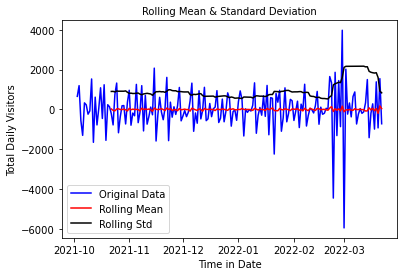

In [41]:
Visitors_data_seasonal_first_difference=Visitors_data_first_difference-Visitors_data_first_difference.shift(1)
TestStationaryPlot(Visitors_data_seasonal_first_difference.dropna(inplace=False))

In [42]:
TestStationaryAdfuller(Visitors_data_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -6.432838e+00
p-value                        1.680769e-08
#Lags Used                     1.300000e+01
Number of observations Used    1.570000e+02
Critical Value (1%)           -3.472703e+00
Critical Value (5%)           -2.880132e+00
Critical Value (10%)          -2.576683e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


### 3.Eliminating trend and seasonality: Decomposing

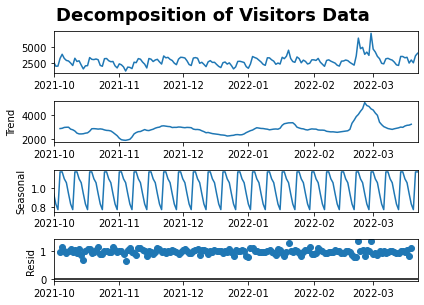

In [43]:
decomposition = seasonal_decompose(Visitors_data,model='multiplicative')

seasonal_decompose(Visitors_data,model='multiplicative').plot()
plt.tight_layout()
plt.suptitle('Decomposition of Visitors Data', weight='bold', fontsize=18, y=1.05)
plt.show()

#### Here we can see that the trend, no seasonaltiy in data and we can model the trend. Here original data and trend both are equal.

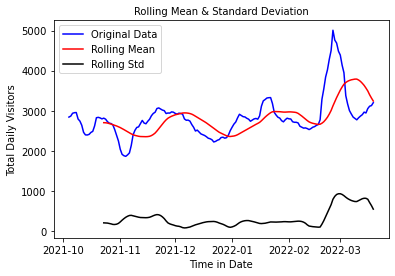

Test Statistic                  -1.566814
p-value                          0.500239
#Lags Used                      14.000000
Number of observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64
Failed to accept null Hypothesis. Data is non-stationary


In [44]:
decomposition=seasonal_decompose(Visitors_data,model='multiplicative')
trend=decomposition.trend
Visitors_Data_decompose=trend
Visitors_Data_decompose.dropna(inplace=True)
TestStationaryPlot(Visitors_Data_decompose)
TestStationaryAdfuller(Visitors_Data_decompose)

## Plot the ACF and PACF charts and find the optimal parameters

### ACF & PACF plot for seasonal first order difference

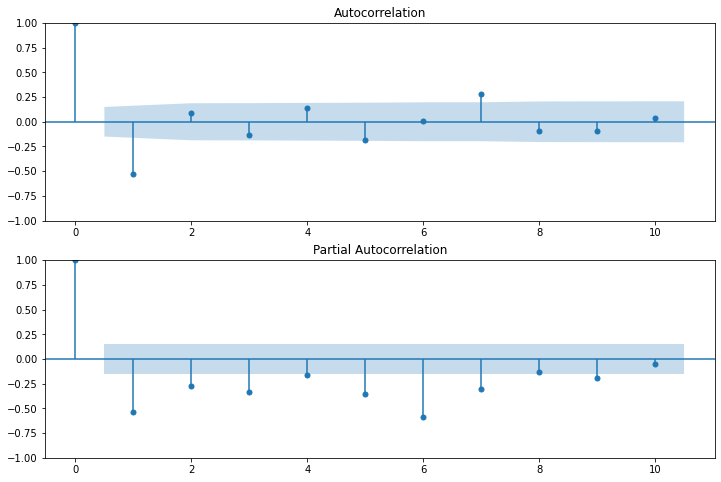

In [45]:
#ACF and PACF plots:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(Visitors_data_seasonal_first_difference.dropna(inplace=False),lags=10,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(Visitors_data_seasonal_first_difference.dropna(inplace=False),lags=10,ax=ax2)

#### We will find optimal parameters (p,d,q) using grid search later

### Data Partitioning

#### Training Data = Fit the model only to training period

#### Validating Data = Assess the model performance on validation

#### Deploy model by training on whole dataset

#### No random partition That’s because the order sequence of the time series should be intact in order to use it for forecasting.

In [46]:
#using seasonal first order difference
Visitors_data_seasonal_first_difference.head()

Daily_Visitors
Date                      
2021-10-01             NaN
2021-10-02             NaN
2021-10-03           660.0
2021-10-04          1197.0
2021-10-05          -557.0

In [47]:
X=Visitors_data_seasonal_first_difference.dropna(inplace=False)
X.head()

Daily_Visitors
Date                      
2021-10-03           660.0
2021-10-04          1197.0
2021-10-05          -557.0
2021-10-06         -1299.0
2021-10-07           332.0

In [48]:
# Create Training and Test
train=X.iloc[:-20]
test=X.iloc[-20:]
print(train.shape,test.shape)

(151, 1) (20, 1)


In [49]:
train.head()

Daily_Visitors
Date                      
2021-10-03           660.0
2021-10-04          1197.0
2021-10-05          -557.0
2021-10-06         -1299.0
2021-10-07           332.0

In [50]:
test.head()

Daily_Visitors
Date                      
2022-03-03          -232.0
2022-03-04           327.0
2022-03-05          -371.0
2022-03-06           650.0
2022-03-07           880.0

### Hyper-parameter Tuning : Finding out optimal (p,d,q)¶

In [51]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [52]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [53]:
# evaluate parameters
p_values = [0, 1, 2, 3, 4, 5]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=817.326
ARIMA(0, 0, 1) RMSE=590.203
ARIMA(0, 0, 2) RMSE=704.611
ARIMA(0, 1, 0) RMSE=1509.257
ARIMA(0, 1, 1) RMSE=817.321
ARIMA(0, 1, 2) RMSE=588.579
ARIMA(0, 2, 0) RMSE=3494.776
ARIMA(0, 2, 1) RMSE=1514.165
ARIMA(0, 2, 2) RMSE=825.328
ARIMA(1, 0, 0) RMSE=705.415
ARIMA(1, 0, 1) RMSE=603.036
ARIMA(1, 0, 2) RMSE=629.963
ARIMA(1, 1, 0) RMSE=1301.908
ARIMA(1, 1, 1) RMSE=706.016
ARIMA(1, 1, 2) RMSE=627.172
ARIMA(1, 2, 0) RMSE=2345.778
ARIMA(1, 2, 1) RMSE=1307.896
ARIMA(1, 2, 2) RMSE=717.411
ARIMA(2, 0, 0) RMSE=714.197
ARIMA(2, 0, 1) RMSE=656.545
ARIMA(2, 0, 2) RMSE=619.333
ARIMA(2, 1, 0) RMSE=1052.874
ARIMA(2, 1, 1) RMSE=711.160
ARIMA(2, 1, 2) RMSE=652.617
ARIMA(2, 2, 0) RMSE=1766.209
ARIMA(2, 2, 1) RMSE=1058.198
ARIMA(2, 2, 2) RMSE=718.111
ARIMA(3, 0, 0) RMSE=745.966
ARIMA(3, 0, 1) RMSE=676.339
ARIMA(3, 0, 2) RMSE=693.191
ARIMA(3, 1, 0) RMSE=980.848
ARIMA(3, 1, 1) RMSE=745.747
ARIMA(3, 2, 0) RMSE=1641.437
ARIMA(3, 2, 1) RMSE=986.692
ARIMA(3, 2, 2) RMSE=753.762
ARIMA(4, 0

## ARIMA model

In [54]:
warnings.filterwarnings('ignore')
model_arima=ARIMA(train['Daily_Visitors'],order=(0,1,2))
model_arima=model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Daily_Visitors   No. Observations:                  151
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1201.179
Date:                Fri, 12 Jan 2024   AIC                           2408.359
Time:                        19:53:34   BIC                           2417.391
Sample:                    10-03-2021   HQIC                          2412.028
                         - 03-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9979      0.063    -31.577      0.000      -2.122      -1.874
ma.L2          0.9980      0.063     15.717      0.000       0.874       1.122
sigma2       4.75e+05   2.67e-07   1.78e+12      0.000    4.75e+05    4.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.77   Jarque-Bera (JB):               220.38
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                             1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.6e+26. Standard errors may be unstable.
"""

In [55]:
### make prediction on test set
start=len(train)
end=len(train)+len(test)-1
pred_arima=model_arima.predict(start=start, end=end)
print(pred_arima)

2022-03-03    494.070484
2022-03-04      0.383091
2022-03-05      0.383091
2022-03-06      0.383091
2022-03-07      0.383091
2022-03-08      0.383091
2022-03-09      0.383091
2022-03-10      0.383091
2022-03-11      0.383091
2022-03-12      0.383091
2022-03-13      0.383091
2022-03-14      0.383091
2022-03-15      0.383091
2022-03-16      0.383091
2022-03-17      0.383091
2022-03-18      0.383091
2022-03-19      0.383091
2022-03-20      0.383091
2022-03-21      0.383091
2022-03-22      0.383091
Freq: D, Name: predicted_mean, dtype: float64


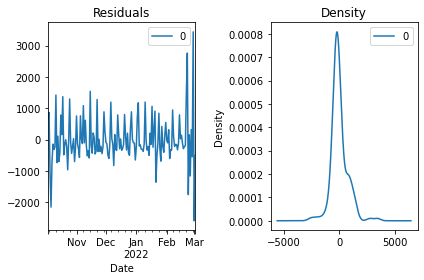

In [56]:
# Plot residual errors
residuals=pd.DataFrame(model_arima.resid)
fig , ax=plt.subplots(1,2)
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(kind='kde',title='Density',ax=ax[1])
plt.tight_layout()
plt.show()


In [57]:
def forecast_accuracy(forecast, actual):
    mape=np.mean(np.abs(forecast-actual)/np.abs(actual)) #Mean Absolute Percentage Error
    me=np.mean(forecast- actual) #Mean Error
    mae=np.mean((np.abs(forecast-actual))) #Mean Absolute Error
    mpe=np.mean((forecast-actual)/actual) #Mean Percentage Error
    rmse= np.mean((forecast-actual)**2)**.5
    return({'mape':mape,'me':me,'mae':mae,'mpe':mpe,'rmse':rmse})

In [58]:
stationary_arima_acc=forecast_accuracy(pred_arima.values,test.values)
stationary_arima_acc

{'mape': 1.0576000394086693,
 'me': -17.232539454817598,
 'mae': 661.0331557250288,
 'mpe': -0.9990673246431305,
 'rmse': 821.1928606564669}

# Auto_Regressor (AR) model

In [59]:
model_ar=AutoReg(train,lags=6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:         Daily_Visitors   No. Observations:                  151
Model:                     AutoReg(6)   Log Likelihood               -1132.499
Method:               Conditional MLE   S.D. of innovations            596.690
Date:                Fri, 12 Jan 2024   AIC                           2280.997
Time:                        19:53:35   BIC                           2304.811
Sample:                    10-09-2021   HQIC                          2290.674
                         - 03-02-2022                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.2505     49.580     -0.146      0.884    -104.426      89.925
Daily_Visitors.L1    -1.1465      0.069    -16.606      0.000      -1.282      -1.011
Daily_Visitors.L2    -1.

In [60]:
pred_ar=model_ar.predict(start=start,end=end,dynamic=False)
print(pred_ar)

2022-03-03    -138.307830
2022-03-04     815.476133
2022-03-05    -600.110210
2022-03-06    1112.348315
2022-03-07     436.007499
2022-03-08   -2970.041454
2022-03-09    1545.577764
2022-03-10     -78.452604
2022-03-11     709.554171
2022-03-12    -762.454869
2022-03-13    1237.495414
2022-03-14    -909.911276
2022-03-15   -1028.244139
2022-03-16     854.998191
2022-03-17     247.203665
2022-03-18     146.457226
2022-03-19    -354.759581
2022-03-20     688.821647
2022-03-21    -974.400621
2022-03-22    -151.794854
Freq: D, dtype: float64


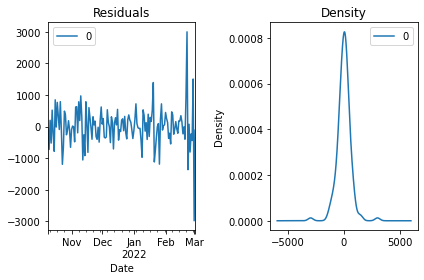

In [61]:
# Plot residual errors
residuals=pd.DataFrame(model_ar.resid)
fig ,ax=plt.subplots(1,2)
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(kind='kde',title='Density',ax=ax[1])
plt.tight_layout()
plt.show()

In [62]:
stationary_ar_acc=forecast_accuracy(pred_ar.values,test.values)
stationary_ar_acc

{'mape': 3.086116917038859,
 'me': -51.02687062398646,
 'mae': 1022.5604132319926,
 'mpe': -1.0003246973166233,
 'rmse': 1301.457925360827}

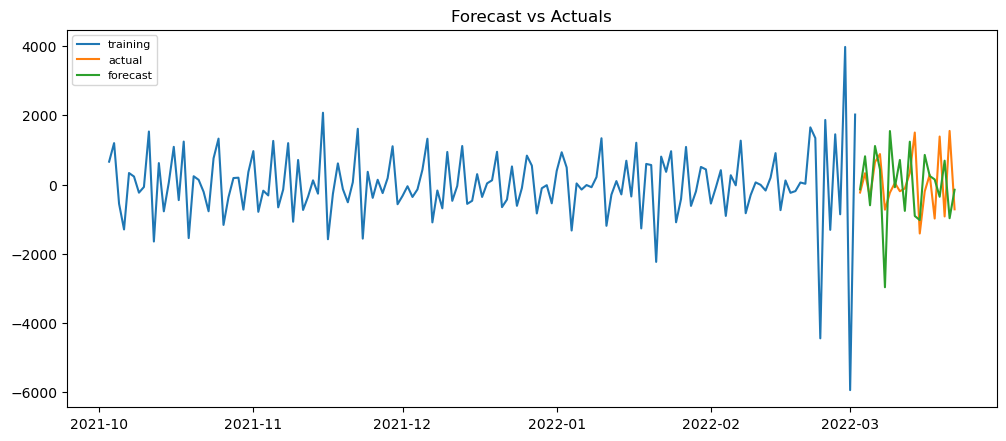

In [63]:
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train,label='training')
plt.plot(test,label='actual')
plt.plot(pred_ar,label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left',fontsize=8)
plt.show()

### Moving Average (MA) model

In [64]:
# only use q or MA parameter
#MA(3)
model_ma=ARIMA(train['Daily_Visitors'],order=(4,1,2))
model_ma=model_ma.fit()
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Daily_Visitors   No. Observations:                  151
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -1219.141
Date:                Fri, 12 Jan 2024   AIC                           2452.283
Time:                        19:53:36   BIC                           2473.357
Sample:                    10-03-2021   HQIC                          2460.845
                         - 03-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7679    824.864     -0.002      0.998   -1618.471    1614.935
ar.L2         -1.3180    650.662     -0.002      0.998   -1276.592    1273.956
ar.L3         -0.9348    450.068     -0.002      0.998    -883.052     881.182
ar.L4         -0.3922    330.388     -0.001      0.999    -647.940     647.156
ma.L1         -0.0209    824.873  -2.53e-05      1.000   -1616.742    1616.701
ma.L2         -0.9791    824.836     -0.001      0.999   -1617.628    1615.669
sigma2       6.41e+05      0.002   3.03e+08      0.000    6.41e+05    6.41e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                91.17
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                             0.66
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.12e+28. Standard errors may be unstable.
"""

In [65]:
pred_ma=model_ma.predict(start=start,end=end)
print(pred_ma)

2022-03-03      51.097002
2022-03-04    1232.899089
2022-03-05   -1814.509333
2022-03-06     733.927794
2022-03-07     -86.966095
2022-03-08     390.692333
2022-03-09    -558.960706
2022-03-10     258.374228
2022-03-11     -59.587829
2022-03-12     125.703777
2022-03-13    -174.409219
2022-03-14      88.656006
2022-03-15     -29.399541
2022-03-16      40.472499
2022-03-17     -55.673031
2022-03-18      29.407144
2022-03-19     -13.309691
2022-03-20      12.549778
2022-03-21     -18.693546
2022-03-22       9.025684
Freq: D, Name: predicted_mean, dtype: float64


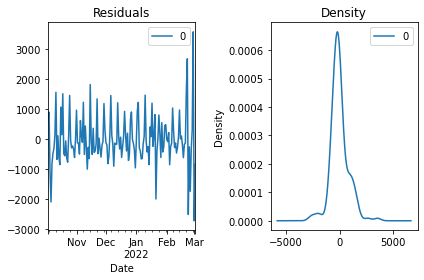

In [66]:
# Plot residual errors
residuals=pd.DataFrame(model_ma.resid)
fig,ax=plt.subplots(1,2)
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(kind='kde',title='Density',ax=ax[1])
plt.tight_layout()
plt.show()

In [67]:
stationary_ma_acc=forecast_accuracy(pred_ma.values,test.values)
stationary_ma_acc

{'mape': 1.6860687833705719,
 'me': -34.23518280900862,
 'mae': 773.0885315435629,
 'mpe': -0.9996999354506556,
 'rmse': 980.5564804352535}

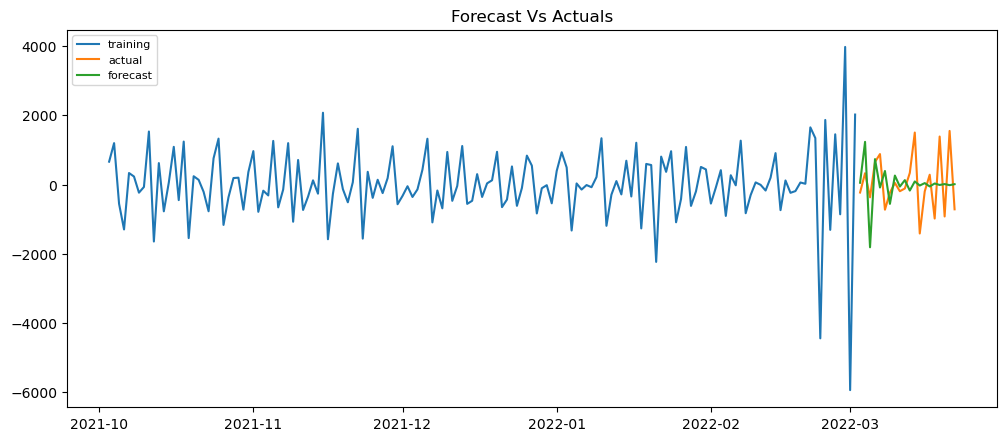

In [68]:
# Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train,label='training')
plt.plot(test,label='actual')
plt.plot(pred_ma,label='forecast')
plt.title('Forecast Vs Actuals')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [69]:
data={'MODEL':pd.Series(['ARIMA',"Auto Regressor","Moving Average"]),"RMSE_Values":pd.Series([stationary_arima_acc['rmse'],stationary_ar_acc['rmse'],stationary_ma_acc['rmse']]),
      "MAPE_values":pd.Series([stationary_arima_acc['mape'],stationary_ar_acc['mape'],stationary_ma_acc['mape']]),
     "ME_values":pd.Series([stationary_arima_acc['me'],stationary_ar_acc['me'],stationary_ma_acc['me']]),
     'MAE_values':pd.Series([stationary_arima_acc['mae'],stationary_ar_acc['mae'],stationary_ma_acc['mae']]),
     'MPE_values':pd.Series([stationary_arima_acc['mpe'],stationary_ar_acc['mpe'],stationary_ma_acc['mpe']])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

MODEL  RMSE_Values  MAPE_values  ME_values   MAE_values  \
0           ARIMA   821.192861     1.057600 -17.232539   661.033156   
2  Moving Average   980.556480     1.686069 -34.235183   773.088532   
1  Auto Regressor  1301.457925     3.086117 -51.026871  1022.560413   

   MPE_values  
0   -0.999067  
2   -0.999700  
1   -1.000325

## Final Model

In [70]:
Final_arima=ARIMA(Visitors_data['Daily_Visitors'],order=(0,1,2))
Final_arima=Final_arima.fit()
Final_arima.summary()
                  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Daily_Visitors   No. Observations:                  173
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1351.620
Date:                Fri, 12 Jan 2024   AIC                           2709.241
Time:                        19:53:36   BIC                           2718.683
Sample:                    10-01-2021   HQIC                          2713.072
                         - 03-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4106      0.054     -7.620      0.000      -0.516      -0.305
ma.L2         -0.2912      0.055     -5.321      0.000      -0.398      -0.184
sigma2      3.852e+05   2.12e+04     18.157      0.000    3.44e+05    4.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):               445.48
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               2.48   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
Final_arima.fittedvalues.tail()

Date
2022-03-18    3250.285431
2022-03-19    2737.866222
2022-03-20    3098.440646
2022-03-21    2696.427855
2022-03-22    3417.500276
dtype: float64

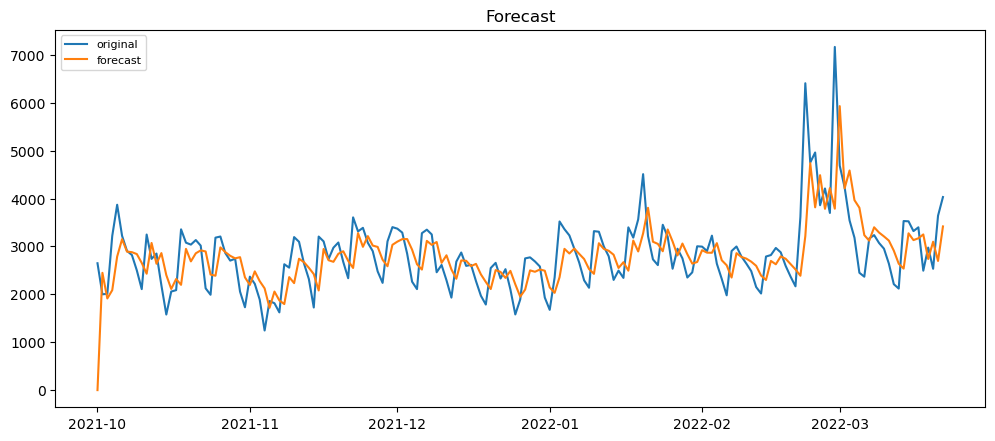

In [72]:
plt.figure(figsize=(12,5),dpi=100)
plt.plot(Visitors_data,label='original')
plt.plot(Final_arima.fittedvalues,label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left',fontsize=8)
plt.show()

### B) MODEL BUILDING ON NON-STATIONARY DATA / ORIGINAL DATA

In [73]:
Visitors_data.head()

Daily_Visitors
Date                      
2021-10-01            2649
2021-10-02            2000
2021-10-03            2011
2021-10-04            3219
2021-10-05            3870

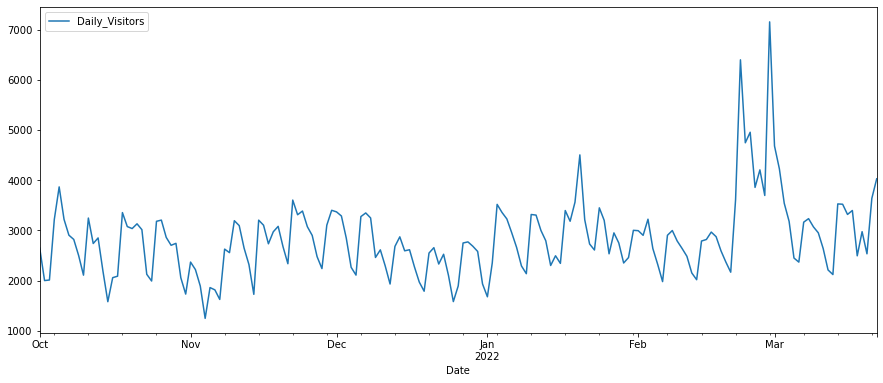

In [74]:
Visitors_data.plot(figsize=(15,6))
plt.show()

### Data Partitioning

In [75]:
train=Visitors_data[:150]
test=Visitors_data[150:]
print(train.shape,test.shape)

(150, 1) (23, 1)


In [76]:
train.head()

Daily_Visitors
Date                      
2021-10-01            2649
2021-10-02            2000
2021-10-03            2011
2021-10-04            3219
2021-10-05            3870

In [77]:
test.head()

Daily_Visitors
Date                      
2022-02-28            7165
2022-03-01            4687
2022-03-02            4231
2022-03-03            3543
2022-03-04            3182

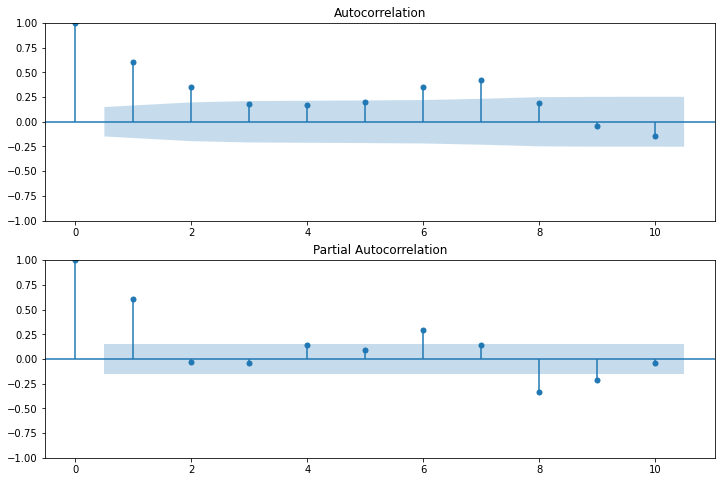

In [78]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(Visitors_data , lags=10 , ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(Visitors_data, lags=10 , ax=ax2)

### Hyper-parameter Tuning : Finding out optimal (p,d,q)

In [79]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train,test,arima_order):
    history =[x for x in train]
    # make predictions
    predictions=list()
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse=sqrt(mean_squared_error(test,predictions))
    return rmse

In [80]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train,test,p_values,d_values,q_values):
    best_score, best_cfg=float('inf'),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order =(p,d,q)
                try:
                    rmse=evaluate_arima_model(train,test,order)
                    if rmse < best_score:
                        best_score , best_cfg =rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' %(best_cfg,best_score))

In [81]:
# evaluate parameters
p_values=[0,1,2,3,4,5]
d_values=range(0,5)
q_values=range(0,5)
evaluate_models(train.values,test.values,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=1168.330
ARIMA(0, 0, 1) RMSE=1075.207
ARIMA(0, 0, 2) RMSE=980.508
ARIMA(0, 0, 3) RMSE=993.508
ARIMA(0, 0, 4) RMSE=970.347
ARIMA(0, 1, 0) RMSE=1045.496
ARIMA(0, 1, 1) RMSE=1020.369
ARIMA(0, 1, 2) RMSE=1018.212
ARIMA(0, 1, 3) RMSE=989.381
ARIMA(0, 1, 4) RMSE=1060.545
ARIMA(0, 2, 0) RMSE=1726.036
ARIMA(0, 2, 1) RMSE=1048.921
ARIMA(0, 2, 2) RMSE=1031.348
ARIMA(0, 2, 3) RMSE=1058.924
ARIMA(0, 2, 4) RMSE=1070.565
ARIMA(0, 3, 0) RMSE=3168.094
ARIMA(0, 3, 1) RMSE=1731.728
ARIMA(0, 3, 2) RMSE=1056.378
ARIMA(0, 3, 3) RMSE=1121.160
ARIMA(0, 3, 4) RMSE=1096.088
ARIMA(0, 4, 0) RMSE=6018.683
ARIMA(0, 4, 1) RMSE=3178.372
ARIMA(0, 4, 2) RMSE=1747.946
ARIMA(0, 4, 3) RMSE=1160.466
ARIMA(0, 4, 4) RMSE=1070.350
ARIMA(1, 0, 0) RMSE=949.739
ARIMA(1, 0, 1) RMSE=977.308
ARIMA(1, 0, 2) RMSE=989.080
ARIMA(1, 0, 3) RMSE=967.526
ARIMA(1, 0, 4) RMSE=1001.982
ARIMA(1, 1, 0) RMSE=1023.674
ARIMA(1, 1, 1) RMSE=955.092
ARIMA(1, 1, 2) RMSE=1002.350
ARIMA(1, 1, 3) RMSE=1009.885
ARIMA(1, 1, 4) RMSE=108

### ARIMA

In [82]:
model_arima=ARIMA(train['Daily_Visitors'],order=(5,1,4))
model_arima=model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Daily_Visitors   No. Observations:                  150
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -1120.138
Date:                Fri, 12 Jan 2024   AIC                           2260.275
Time:                        20:07:40   BIC                           2290.315
Sample:                    10-01-2021   HQIC                          2272.480
                         - 02-27-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3464      0.149      2.325      0.020       0.054       0.639
ar.L2         -1.0548      0.137     -7.681      0.000      -1.324      -0.786
ar.L3          0.1261      0.225      0.561      0.575      -0.314       0.567
ar.L4         -0.6226      0.127     -4.888      0.000      -0.872      -0.373
ar.L5         -0.4428      0.144     -3.084      0.002      -0.724      -0.161
ma.L1         -0.7296      0.136     -5.373      0.000      -0.996      -0.463
ma.L2          1.1999      0.173      6.944      0.000       0.861       1.539
ma.L3         -0.6152      0.169     -3.650      0.000      -0.946      -0.285
ma.L4          0.8783      0.157      5.593      0.000       0.571       1.186
sigma2       2.59e+05   4.88e+04      5.304      0.000    1.63e+05    3.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1224.18
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                             2.29
Prob(H) (two-sided):                  0.07   Kurtosis:                        16.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
start=len(train)
end=len(train)+len(test)-1
pred_arima=model_arima.predict(start=start,end=end)
print(pred_arima)

2022-02-28    4409.370384
2022-03-01    4922.257119
2022-03-02    4797.378453
2022-03-03    4183.439772
2022-03-04    3951.134939
2022-03-05    3868.592788
2022-03-06    3858.237178
2022-03-07    4349.960604
2022-03-08    4937.305974
2022-03-09    4775.071005
2022-03-10    4204.370209
2022-03-11    3950.295442
2022-03-12    3860.347201
2022-03-13    3866.132089
2022-03-14    4358.132667
2022-03-15    4922.024476
2022-03-16    4767.658777
2022-03-17    4217.687280
2022-03-18    3952.215632
2022-03-19    3851.927039
2022-03-20    3874.251057
2022-03-21    4365.059457
2022-03-22    4907.706077
Freq: D, Name: predicted_mean, dtype: float64


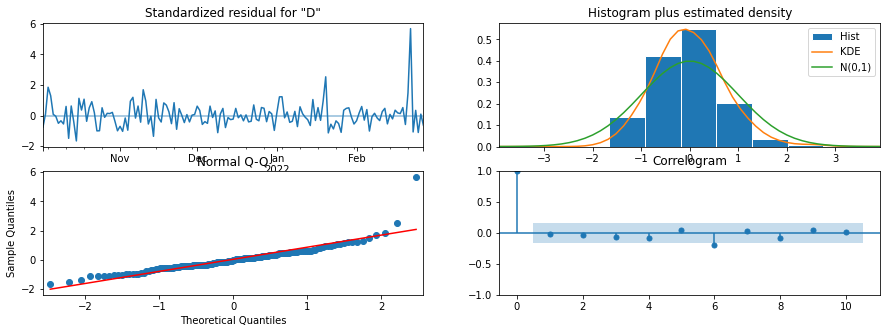

In [84]:
model_arima.plot_diagnostics(figsize=(15,5))
plt.show()

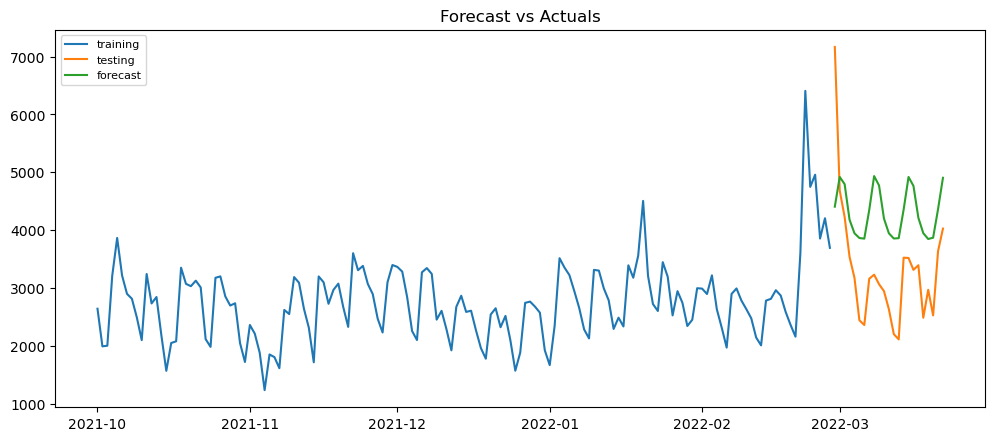

In [85]:
# Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train,label='training')
plt.plot(test,label='testing')
plt.plot(pred_arima,label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [86]:
ns_arima_acc=forecast_accuracy(pred_arima,test.Daily_Visitors)
ns_arima_acc

{'mape': 0.4032597926797027,
 'me': 985.937200836712,
 'mae': 1225.5571674535165,
 'mpe': 0.36981667103046256,
 'rmse': 1332.5210240219399}

## Auto ARIMA

In [87]:
model_auto=pm.auto_arima(train['Daily_Visitors'],start_p=0,start_q=0,
                        test='adf', max_p=4,max_q=4,m=1,d=None,seasonal=False,
                        start_P=0,D=0,trace=True,error_action='ignore',
                        suppress_warnings=True,stepwise=True)
print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2330.154, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2331.037, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2330.069, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2328.176, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.599 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1163.088
Date:                Fri, 12 Jan 2024   AIC                           2328.176
Time:                        20:07:42   BIC                           2331.180
Sample:                    10-01-2021   HQIC                          2329.396
                         - 02-27-2022                                         
Co

In [88]:
pred_auto_arima=model_auto.predict(start=start,end=end)
print(pred_auto_arima.T.values)

[3699. 3699. 3699. 3699. 3699. 3699. 3699. 3699. 3699. 3699.]


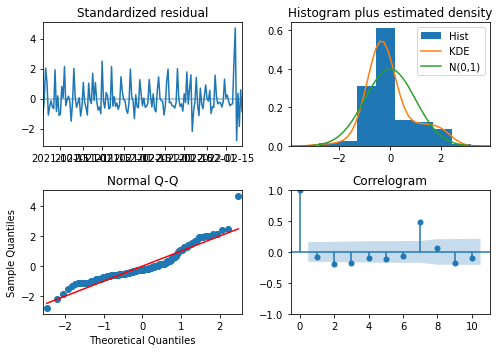

In [89]:
model_auto.plot_diagnostics(figsize=(7,5))
plt.tight_layout()
plt.show()

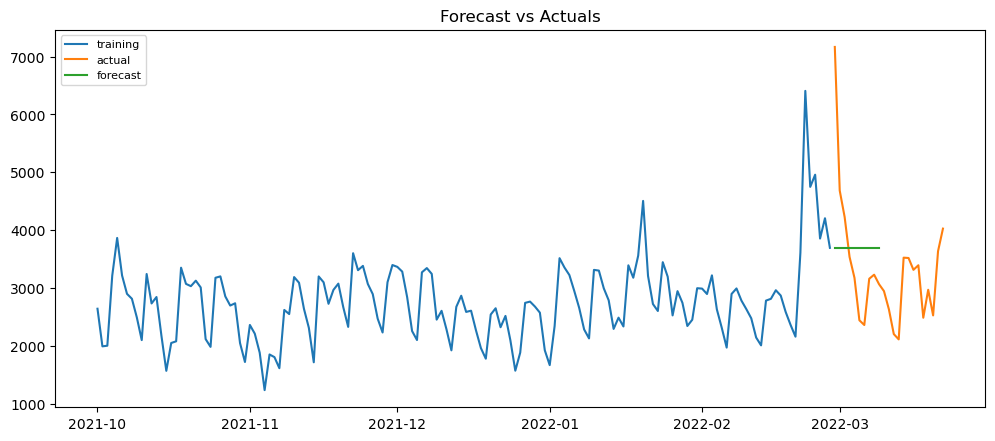

In [90]:
#Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train,label='training')
plt.plot(test,label='actual')
plt.plot(pred_auto_arima,label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left',fontsize=8)
plt.show()

## Auto Regressor

In [91]:
model_ar=AutoReg(train,lags=1).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:         Daily_Visitors   No. Observations:                  150
Model:                     AutoReg(1)   Log Likelihood               -1147.823
Method:               Conditional MLE   S.D. of innovations            536.236
Date:                Fri, 12 Jan 2024   AIC                           2301.647
Time:                        20:07:43   BIC                           2310.658
Sample:                    10-02-2021   HQIC                          2305.308
                         - 02-27-2022                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1041.9588    183.211      5.687      0.000     682.872    1401.045
Daily_Visitors.L1     0.6233      0.065      9.629      0.000       0.496       0.750
                        

In [92]:
pred_ar=model_ar.predict(start=start,end=end,dynamic=False)
print(pred_ar)

2022-02-28    3347.721641
2022-03-01    3128.753114
2022-03-02    2992.259604
2022-03-03    2907.176700
2022-03-04    2854.140475
2022-03-05    2821.080471
2022-03-06    2800.472596
2022-03-07    2787.626726
2022-03-08    2779.619284
2022-03-09    2774.627864
2022-03-10    2771.516474
2022-03-11    2769.576997
2022-03-12    2768.368028
2022-03-13    2767.614420
2022-03-14    2767.144661
2022-03-15    2766.851837
2022-03-16    2766.669306
2022-03-17    2766.555526
2022-03-18    2766.484602
2022-03-19    2766.440391
2022-03-20    2766.412832
2022-03-21    2766.395654
2022-03-22    2766.384945
Freq: D, dtype: float64


In [93]:
ns_ar_acc=forecast_accuracy(pred_ar.values,test.values)
ns_ar_acc

{'mape': 0.2006597797500591,
 'me': -491.48286313891566,
 'mae': 761.2185496116282,
 'mpe': -0.08532251381945744,
 'rmse': 1155.2329557462697}

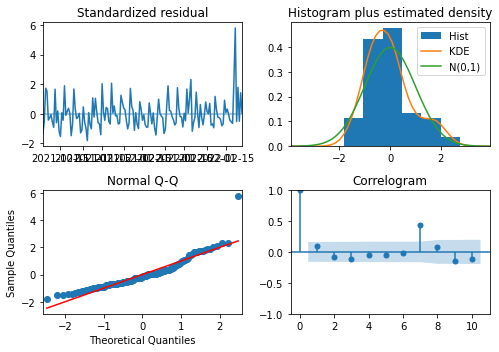

In [94]:
model_ar.plot_diagnostics(figsize=(7,5))
plt.tight_layout()
plt.show()

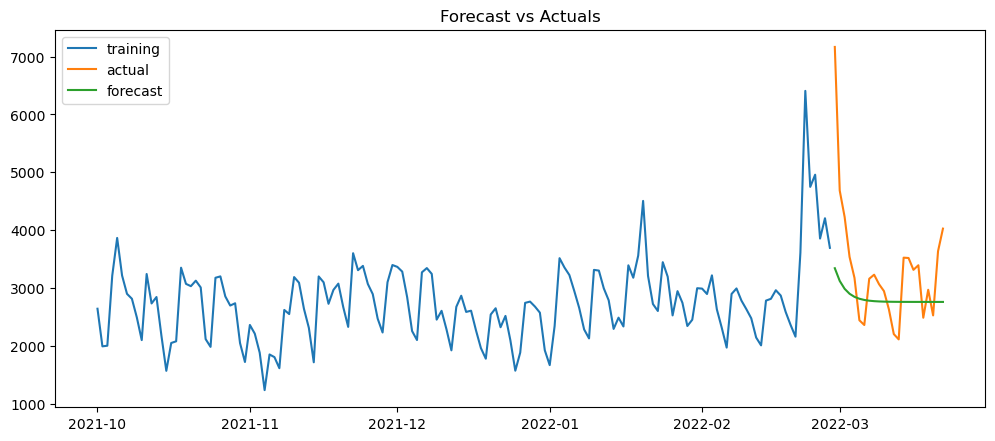

In [95]:
#Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train,label='training')
plt.plot(test,label='actual')
plt.plot(pred_ar,label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left',fontsize=10)
plt.show()

### Single Exponential Smoothing

In [96]:
fit1=SimpleExpSmoothing(train).fit(smoothing_level=0.2,optimized=False)
fit2=SimpleExpSmoothing(train).fit(smoothing_level=0.8,optimized=False)

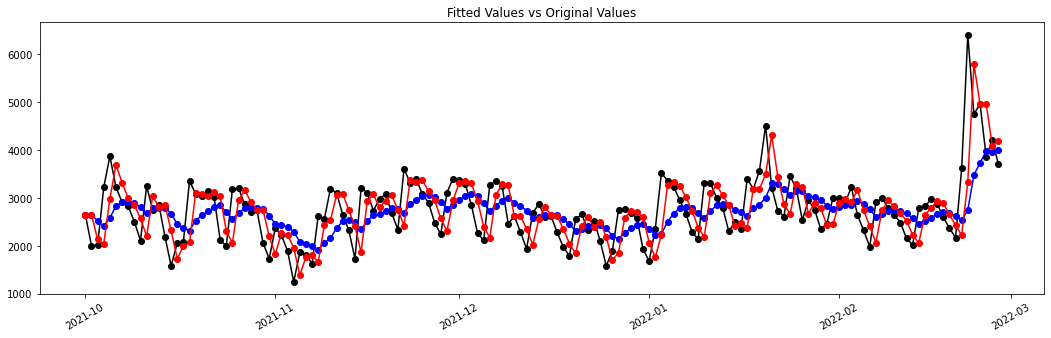

In [97]:
#Plot
plt.figure(figsize=(18,5))
plt.plot(train,marker='o',color='black')
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='red')
plt.title('Fitted Values vs Original Values')
plt.show()

In [98]:
pred_ses=fit1.predict(start=len(train),end=len(train)+len(test)-1)
ns_ses_acc=forecast_accuracy(pred_ses,test.Daily_Visitors)
ns_ses_acc

{'mape': 0.33396363769454357,
 'me': 619.6224024996466,
 'mae': 996.6384288513759,
 'mpe': 0.2733548884466769,
 'rmse': 1207.232500843737}

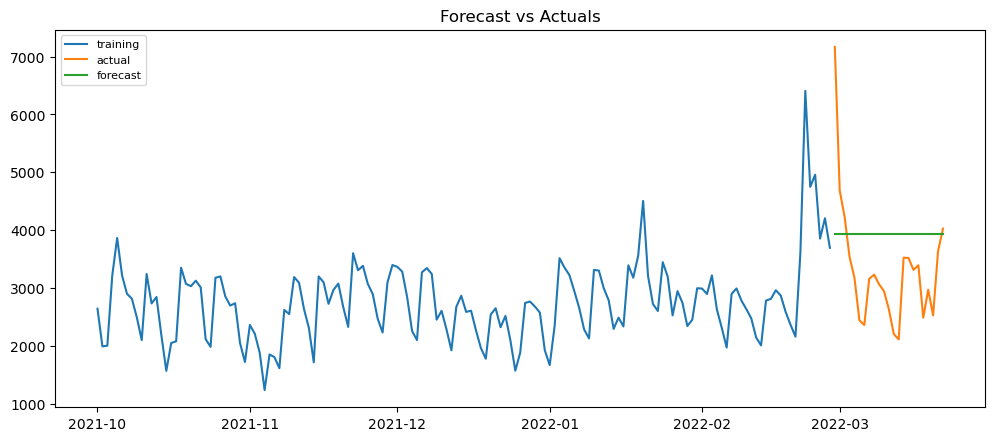

In [99]:
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train,label='training')
plt.plot(test,label='actual')
plt.plot(pred_ses,label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left',fontsize=8)
plt.show()

### Double Exponential Smoothing or Holt's method

In [100]:
fit3=Holt(train,exponential=True,damped_trend=False).fit()

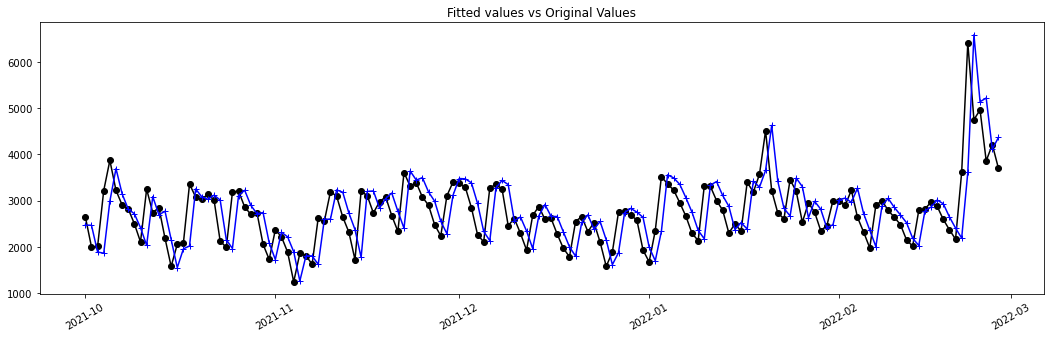

In [101]:
plt.figure(figsize=(18,5))
plt.plot(train,marker='o',color='black')
plt.xticks(rotation=30)
plt.plot(fit3.fittedvalues,marker='+',color='blue')
plt.title('Fitted values vs Original Values')
plt.show()

In [102]:
pred_holt=fit3.predict(start=len(train),end=len(train)+len(test)-1)
ns_des_acc=forecast_accuracy(pred_holt,test.Daily_Visitors)
ns_des_acc

{'mape': 0.881465702810682,
 'me': 2273.3532122158426,
 'mae': 2629.6346878315803,
 'mpe': 0.8263767608969638,
 'rmse': 2892.893325823553}

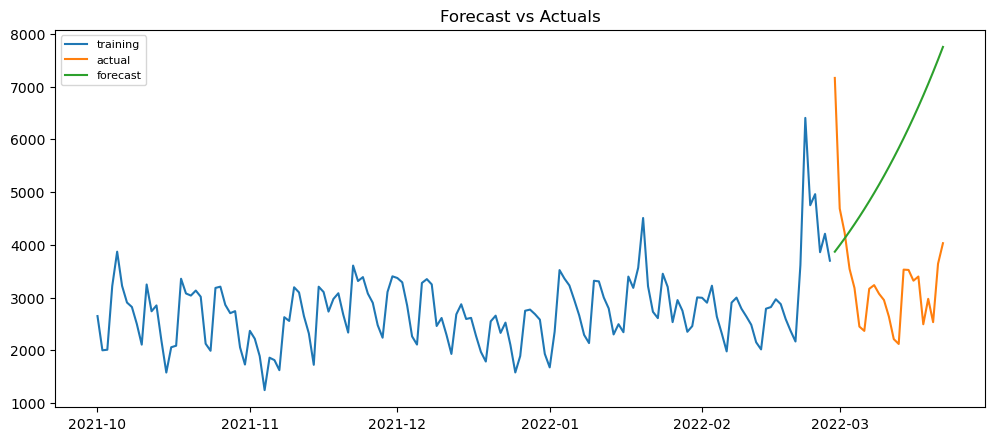

In [103]:
#Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train,label='training')
plt.plot(test,label='actual')
plt.plot(pred_holt,label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left',fontsize=8)
plt.show()

## Forecasting Accuracy

In [104]:
data={'MODEL':pd.Series(['ARIMA(5,1,4)','Auto Regressor','Single Exponential Smoothing','Double Exponential Smoothing']),
     'RMSE_values':pd.Series([ns_arima_acc['rmse'],ns_ar_acc['rmse'],ns_ses_acc['rmse'],ns_des_acc['rmse']]),
     'MAPE_values':pd.Series([ns_arima_acc['mape'],ns_ar_acc['mape'],ns_ses_acc['mape'],ns_des_acc['mape']]),
     'ME_values':pd.Series([ns_arima_acc['me'],ns_ar_acc['me'],ns_ses_acc['me'],ns_des_acc['me']]),
     'MAE_values':pd.Series([ns_arima_acc['mae'],ns_ar_acc['mae'],ns_ses_acc['mae'],ns_des_acc['mae']]),
     'MPE_values':pd.Series([ns_arima_acc['mpe'],ns_ar_acc['mpe'],ns_ses_acc['mpe'],ns_des_acc['mpe']])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['MAPE_values'])

MODEL  RMSE_values  MAPE_values    ME_values  \
1                Auto Regressor  1155.232956     0.200660  -491.482863   
2  Single Exponential Smoothing  1207.232501     0.333964   619.622402   
0                  ARIMA(5,1,4)  1332.521024     0.403260   985.937201   
3  Double Exponential Smoothing  2892.893326     0.881466  2273.353212   

    MAE_values  MPE_values  
1   761.218550   -0.085323  
2   996.638429    0.273355  
0  1225.557167    0.369817  
3  2629.634688    0.826377